# Explicit Euler Scheme

Solving the system of ODE's of a particle with a constant charge q=1 which is suspended in water. The system is given by: $$dv_x(t)= -v_x(t)+2t*v_y(t)+1 $$

$$dv_y(t)= -2t*v_x(t)-v_y(t) $$

We obtain the Euler method
$$ v_x(t+\tau)=(1-\tau)*v_x(t)+2\tau*t*v_y(t)+\tau$$
$$ v_y(t+\tau)=(1-\tau)*v_y(t)-2\tau*t*v_x(t)$$

We compare the error (L2 Norm) with the analytical solution: $$v_x(t)=0.5 + 0.5*e^{-t}(sin(t)-cos(t))$$
 $$v_y(t)=0.5 + 0.5*e^{-t}(sin(t)+cos(t))$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

import sympy as sp

def solveODE(n, tau):
    t = np.arange(0,n*tau,tau)

    # analytical solution
    hsint = 0.5*np.sin(t)
    hcost = 0.5*np.cos(t)
    expmt = np.exp(-t)
    avx = np.add(0.5,np.multiply(expmt,np.subtract(hsint,hcost)))
    avy = np.add(-0.5,np.multiply(expmt,np.add(hsint,hcost)))
    
    nvx = np.zeros(n)
    nvy = np.zeros(n)
    erx2 = np.zeros(n)
    ery2 = np.zeros(n)

    # Explicit Euler
    for k in range(1,n):
        nvx[k] = (1-tau)*nvx[k-1]+tau*nvy[k-1]+tau
        nvy[k] = (1-tau)*nvy[k-1]-tau*nvx[k-1]
        erx2[k] = (avx[k]-nvx[k])**2
        ery2[k] = (avy[k]-nvy[k])**2

    er = np.sqrt(np.add(erx2,ery2))

    return (t, er)

Let's implement and use the initial values

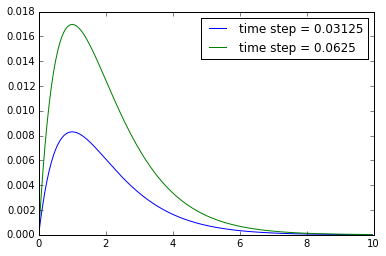

In [2]:
n = 320
tau = 0.03125
t1, er1 = solveODE(n, tau)
t2, er2 = solveODE(n/2, 2*tau)
                   
plt.plot(t1,er1,t2,er2)
plt.legend(['time step = '+str(tau),'time step = '+str(2*tau)])

As we can see halving the time step yiels a reduction of the error by a factor of two. The explicit Euler method hence shows an error of the order $O(\tau)$